# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

По историческим данным о поведении клиентов и расторжении договоров с банком нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Стандартизация</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-и-уменьшение-выборки" data-toc-modified-id="Увеличение-и-уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение и уменьшение выборки</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных
### Изучение данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#!pip install pandas-profiling
#import pandas_profiling 

#pandas_profiling.ProfileReport(data)

In [5]:
# проверим на дубликаты
data.duplicated().sum()

0

In [6]:
# посмотрим распределение значений в целевом признаке
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В датасете 10000 объектов, присутствуют как количиственные, так и качественные признаки.

Есть неинформативные признаки, которые только усложнят обучение модели - 'RowNumber', 'CustomerId', 'Surname'. В одном из признаков - 'Tenure' - присутствуют пропуски, необходимо будет их обработать.

В целевом признаке 2 класса, они не сбалансированы - разберемся с этим позже.


### Предобработка данных
Удалим столбцы 'RowNumber', 'CustomerId', 'Surname' - данные в них не помогут в обучении модели.

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Пропуски в столбце 'Tenure' заполним случайными значениямии, т.к. настоящие значения узнать невозможно.

In [8]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
#data.fillna('-1', inplace = True)
#data['Tenure'] = data['Tenure'].astype(int)
#data.info()

data.loc[data['Tenure'].isna(), 'Tenure'] = data['Tenure'].apply(lambda x: np.random.randint(1, 10))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Исследование задачи

### Разделение на выборки
Целевой признак - 'Exited', остальные признаки помогут предсказать значения этого столбца.

Разобьем данные на три выборки: обучающую, валидационную и тестовую, в пропорции 3:1:1. Затем признаки каждой из выборок запишем в отдельные переменные.

In [11]:
target = data['Exited']
features = data.drop('Exited', axis=1)

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, test_size = 0.4, 
                                                                              random_state = 12345)

features_test, features_valid, target_test, target_valid = train_test_split(features_valid,
                                                                            target_valid, test_size = 0.5, 
                                                                            random_state = 12345)

print('Размер обучающей выборки:', 'признаки:', features_train.shape, 'целевой признак:', target_train.shape, sep='\n')
print('Размер валидационной выборки:', 'признаки:', features_valid.shape, 'целевой признак:', target_valid.shape, sep='\n')
print('Размер тестовой выборки:', 'признаки:', features_test.shape, 'целевой признак:', target_test.shape, sep='\n')

Размер обучающей выборки:
признаки:
(6000, 10)
целевой признак:
(6000,)
Размер валидационной выборки:
признаки:
(2000, 10)
целевой признак:
(2000,)
Размер тестовой выборки:
признаки:
(2000, 10)
целевой признак:
(2000,)


In [13]:
# проверим, какие значения содержит столбец 'Geography'
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Преобразуем столбцы 'Geography', 'Gender' из категориальных в численные техникой OHE и удалим один столбец, чтобы не попасть в дамми-ловушку.

In [14]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


### Стандартизация

Проверим масштаб данных и стандартное отклонение.

In [15]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.993100,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.871215,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Видим, что значения в столбцах 'CreditScore', 'Tenure', 'Age', 'Balance', 'EstimatedSalary' сильно разбросаны. Чтобы алгоритм не решил, что какие-то из них важнее, стандартизируем данные.

In [16]:
pd.options.mode.chained_assignment = None

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

# проверка
features_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000
mean,-4.553395e-16,9.710751e-17,1.403322e-16,-9.947598e-17,1.517833,0.707833,0.526833,-1.539509e-16,0.246833,0.250667,0.548500
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,0.580866,0.454796,0.499321,1.000083e+00,0.431205,0.433433,0.497684
min,-3.140255e+00,-1.986549e+00,-1.757761e+00,-1.233163e+00,1.000000,0.000000,0.000000,-1.722999e+00,0.000000,0.000000,0.000000
25%,-6.894392e-01,-6.579018e-01,-7.085254e-01,-1.233163e+00,1.000000,0.000000,0.000000,-8.642740e-01,0.000000,0.000000,0.000000
50%,2.192061e-02,-1.833849e-01,-9.035083e-03,3.262451e-01,1.000000,1.000000,1.000000,1.114367e-02,0.000000,0.000000,1.000000
75%,6.709715e-01,4.809386e-01,1.040200e+00,8.219488e-01,2.000000,1.000000,1.000000,8.486002e-01,0.000000,1.000000,1.000000
max,2.052152e+00,5.036300e+00,1.739691e+00,2.806159e+00,4.000000,1.000000,1.000000,1.739047e+00,1.000000,1.000000,1.000000


Теперь масштаб признаков одинаковый, можно переходить к обучению моделей.

### Обучение моделей

Обучим модели дерева решений, случайного леса и логистической регрессии без учета дисбаланса классов и подбора гиперпараметров, оценим показатели F1 и AUC-ROC.

**Дерево решений**

In [17]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.48086124401913877
AUC-ROC: 0.6703724191277989


**Случайный лес**

In [18]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5272727272727272
AUC-ROC: 0.8464031564855914


**Логистическая регрессия**

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.27478260869565213
AUC-ROC: 0.738939333294357


Лучший результат показала модель дерева решений, поэтому дальше работать будем с ней.

## Борьба с дисбалансом

Посмотрим на баланс классов в целевом признаке.

In [20]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

Объектов отрицательного класса в 4 раза больше, чем положительного. Применим три разных метода: взвешивание классов, увеличение и уменьшение выборки, и посмотрим, в каком случае метрики качества будут лучше.

### Взвешивание классов

In [21]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5253456221198156
AUC-ROC: 0.8487634749524414


Показатель F1 уменьшился на 0,02 по сравнению с несбалансированной моделью. Попробуем другие методы.

### Увеличение и уменьшение выборки

**Upsampling**

Применим метод upsampling, чтобы увеличить долю объектов более редкого класса.

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [23]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5902503293807642
AUC-ROC: 0.846616776924795


Показатель F1 увеличился на 0,05, AUC-ROC не изменился.

**Downsampling**

Применим метод downsampling, чтобы уменьшить долю более часто встречающегося класса.

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [25]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5787476280834914
AUC-ROC: 0.8441432771024373


Показатель F1 увеличился на 0,04, AUC-ROC не изменился.

### Подбор гиперпараметров

Наилучший результат метрики F1 модель случайного леса показала на увеличенной выборке. Подберем гиперпараметры на данной выборке, которые улучшат работу модели и метрики ее качества.

In [26]:
best_f1 = 0
best_auc = 0
best_depth = 0
best_est = 0
for est in range(10, 100):
    for depth in range(1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, 
                                       max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        f1 = f1_score(target_valid, predicted_valid)
        auc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_auc = auc
            best_depth = depth
            best_est = est

print("Глубина лучшей модели:", best_depth)
print("Количество деревьев лучшей модели:", best_est)
print("F1 лучшей модели:", best_f1)
print("AUC-ROC лучшей модели:", best_auc)

Глубина лучшей модели: 8
Количество деревьев лучшей модели: 40
F1 лучшей модели: 0.624360286591607
AUC-ROC лучшей модели: 0.8581245474619643


Примем за лучшую модель случайный лес с 19 деревьями и глубиной, равной 11, обученный на увеличенной выборке.

## Тестирование модели

In [27]:
model = RandomForestClassifier(random_state=12345, n_estimators=19, 
                                       max_depth=11) 
model.fit(features_upsampled, target_upsampled) 
predicted_test = model.predict(features_test)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5935960591133005
AUC-ROC: 0.8454452374634784


Проверка модели на тестовой выборке показывает, что модель работает достаточно хорошо, метрики снизились незначительно.

Посмотрим, какие признаки имееют наибольшее влияние на вероятность ухода клиента из банка.

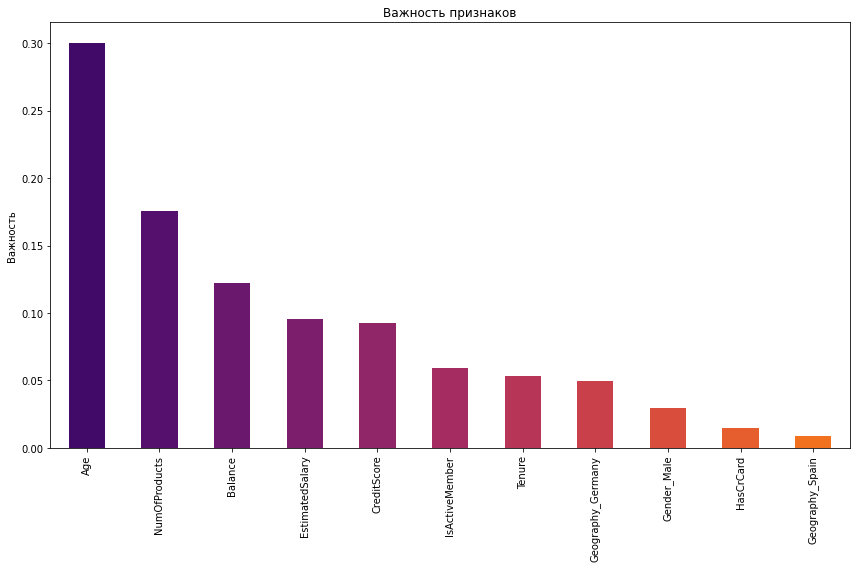

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
color = cm.inferno_r(np.linspace(.8, .12, 15))

model = RandomForestClassifier(random_state=12345, n_estimators=19, 
                                       max_depth=11) 
model.fit(features_upsampled, target_upsampled) 
importance = pd.Series(model.feature_importances_,
                         features_upsampled.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,8))
importance.plot.bar(ax=ax, color = color)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Больше всего на целевой признак влияет возраст клиента. Так же значение имеют количество используемых клиентом продуктов банка, баланс на счете, предполагаемая зарплата и кредитный рейтинг.

## Вывод

Для подбора модели, предсказывающей уход клиента из банка, были обучены 3 модели: дерево решений, случайный лес и логистическая регрессия.

Для оценки предсказаний были использованы метрики F1 и AUC-ROC.

При обучении моделей без учета дисбаланса лучший результат по F1-мере показала модель случайного леса, для которой наиболее оптимальным способом борьбы с дисбалансом стало увеличение выборки.

При подборе гиперпараметров наилучший результат показала модель случайного леса со следующими гиперпараметрами:

- max_depth = 11
- n_estimators = 19

При проверке на тестовой выборке модель достигла F1 = 0,59 и AUC-ROC = 0,85, а значит сможет с достаточной точностью спрогнозировать отток клиентов.

Наибольшее влияние на вероятность ухода клиента из банка из имеют возраст клиента, количество используемых клиентом продуктов банка, баланс на счете, предполагаемая зарплата и кредитный рейтинг.